In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
data_titanic = pd.read_csv(url)

In [5]:
data_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
data_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
data_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: >

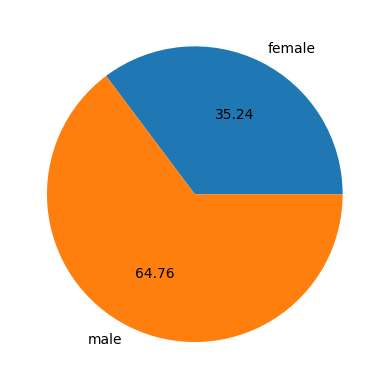

In [18]:
data_titanic.groupby('Sex').size().plot(kind='pie', autopct='%.2f')

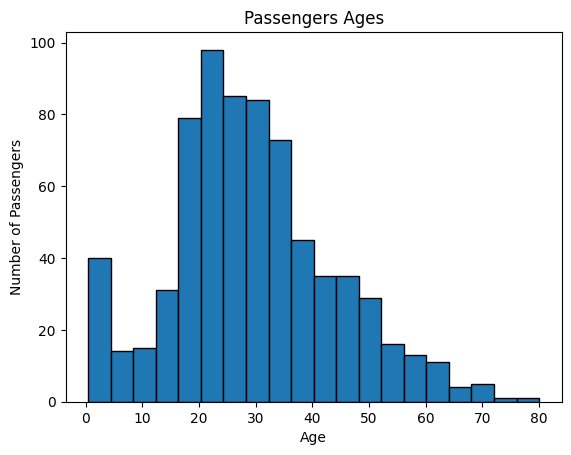

In [32]:
data_titanic['Age'].plot.hist(bins=20, edgecolor='k')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.title('Passengers Ages')
plt.show()

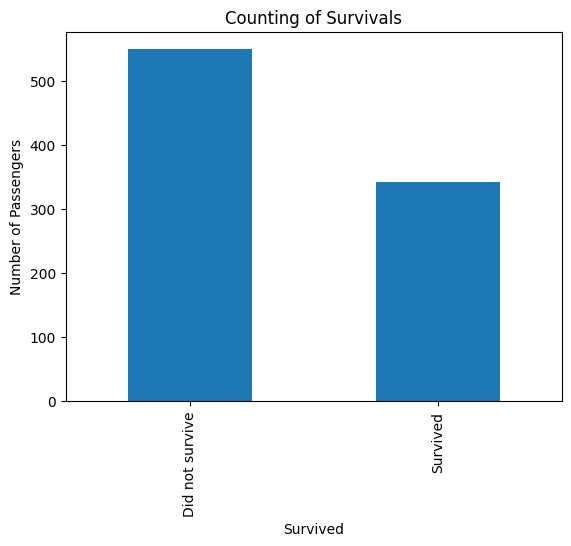

In [47]:
data_titanic['Survived'].value_counts().plot(kind='bar')
plt.xticks([0, 1], ['Did not survive', 'Survived'])
plt.ylabel('Number of Passengers')
plt.title('Counting of Survivals')
plt.show()

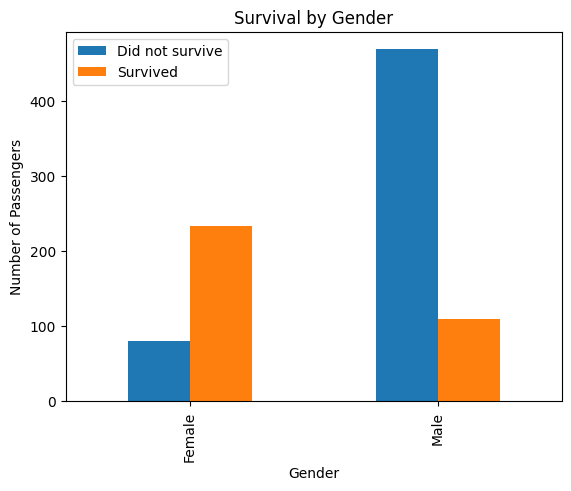

In [55]:
survival_gender = data_titanic.groupby(['Sex', 'Survived']).size().unstack()
survival_gender.plot(kind='bar')
plt.xticks([0, 1], ['Female', 'Male'])
plt.xlabel('Gender')
plt.ylabel('Number of Passengers')
plt.title('Survival by Gender')
plt.legend(['Did not survive', 'Survived'])
plt.show()

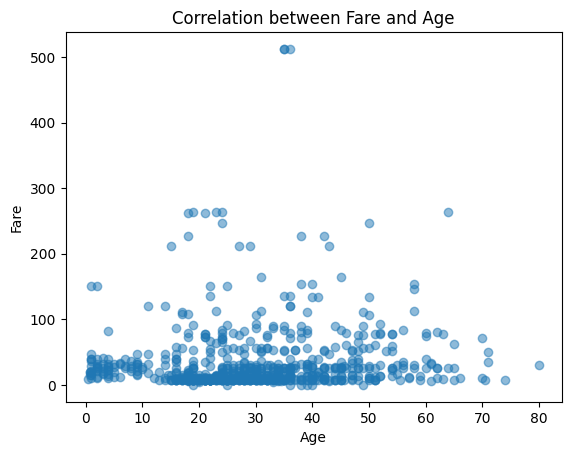

In [65]:
plt.scatter(data_titanic['Age'], data_titanic['Fare'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Correlation between Fare and Age')
plt.show()

In [66]:
median_age = data_titanic['Age'].median()
data_titanic['Age'].fillna(median_age, inplace=True)

In [67]:
median_age

28.0

In [68]:
mean_fare = data_titanic['Fare'].mean()
mean_fare

32.204207968574636

In [70]:
std_fare = data_titanic['Fare'].std()
std_fare

49.6934285971809

In [71]:
data_titanic['Fare'] = (data_titanic['Fare'] - mean_fare) / std_fare

In [72]:
data_titanic['Fare']

0     -0.502163
1      0.786404
2     -0.488580
3      0.420494
4     -0.486064
         ...   
886   -0.386454
887   -0.044356
888   -0.176164
889   -0.044356
890   -0.492101
Name: Fare, Length: 891, dtype: float64

In [80]:
one_hot_encoding = pd.get_dummies(data_titanic['Sex'], prefix='Sex', drop_first=True)
data_titanic = pd.concat([data_titanic, one_hot_encoding], axis=1)

In [81]:
data_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,-0.502163,NaN,S,True,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,0.786404,C85,C,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,-0.488580,NaN,S,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,0.420494,C123,S,False,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,-0.486064,NaN,S,True,True


In [82]:
survival_by_gender = data_titanic.groupby('Sex')['Survived'].mean()

In [83]:
survival_by_gender

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [85]:
survival_by_class = data_titanic.groupby('Pclass')['Survived'].mean()

In [86]:
survival_by_class

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [89]:
passenger_highest_fare = data_titanic[data_titanic['Fare'] == data_titanic['Fare'].max()]

In [90]:
passenger_highest_fare

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male,Sex_male
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,9.66174,NaN,C,False,False
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,9.66174,B51 B53 B55,C,True,True
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,9.66174,B101,C,True,True
